# PoleFigurePhaseFractions.ipynb
Written by Adam Creuziger (adam.creuziger@nist.gov)

Oct 2017

    This data was developed by employees of the National Institute of Standards and Technology (NIST), an agency of the Federal Government. Pursuant to title 17 United States Code Section 105, works of NIST employees are not subject to copyright protection in the United States and are considered to be in the public domain.

    The data is provided by NIST as a public service and is expressly provided "AS IS." NIST MAKES NO WARRANTY OF ANY KIND, EXPRESS, IMPLIED OR STATUTORY, INCLUDING, WITHOUT LIMITATION, THE IMPLIED WARRANTY OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, NON-INFRINGEMENT AND DATA ACCURACY. NIST does not warrant or make any representations regarding the use of the data or the results thereof, including but not limited to the correctness, accuracy, reliability or usefulness of the data. NIST SHALL NOT BE LIABLE AND YOU HEREBY RELEASE NIST FROM LIABILITY FOR ANY INDIRECT, CONSEQUENTIAL, SPECIAL, OR INCIDENTAL DAMAGES (INCLUDING DAMAGES FOR LOSS OF BUSINESS PROFITS, BUSINESS INTERRUPTION, LOSS OF BUSINESS INFORMATION, AND THE LIKE), WHETHER ARISING IN TORT, CONTRACT, OR OTHERWISE, ARISING FROM OR RELATING TO THE DATA (OR THE USE OF OR INABILITY TO USE THIS DATA), EVEN IF NIST HAS BEEN ADVISED OF THE POSSIBILITY OF SUCH DAMAGES.

    To the extent that NIST may hold copyright in countries other than the United States, you are hereby granted the non-exclusive irrevocable and unconditional right to print, publish, prepare derivative works and distribute the NIST data, in any medium, or authorize others to do so on your behalf, on a royalty-free basis throughout the world.

    You may improve, modify, and create derivative works of the data or any portion of the data, and you may copy and distribute such modifications or works. Modified works should carry a notice stating that you changed the data and should note the date and nature of any such change. Please explicitly acknowledge the National Institute of Standards and Technology as the source of the data: Data citation recommendations are provided below.

    Permission to use this data is contingent upon your acceptance of the terms of this agreement and upon your providing appropriate acknowledgments of NIST's creation of the data.


See: https://www.nist.gov/director/licensing

## Packages used in this Jupyter Notebook

In [ ]:
# Install packages not found in conda
# Only needs to be installed during first run
#pip install fortranformat
#pip install mplstereonet

## Need the development release of mplstereonet to work with matplotlib 3.2.2
## https://github.com/joferkington/mplstereonet/issues/34 
#pip install https://github.com/joferkington/mplstereonet/zipball/master

In [4]:
import fortranformat as ff
import numpy as np 
import pandas as pd
import scipy as scipy
from scipy import interpolate 
from scipy import signal
import matplotlib.pyplot as plt
import mplstereonet
import math
import os
from importlib import reload
import seaborn as sns
print ('Finished')

Finished


In [5]:
# Custom modules
import TextureSampling
import PlotTexture

In [6]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

<module 'PlotTexture' from 'c:\\Users\\surya\\Downloads\\project\\Texture-Sampling-PhaseMeasurement-BiasErrors\\JupyterNotebooks\\PlotTexture.py'>

### Test functions

In [4]:
# Sampling scheme test functions
TextureSampling.SingleOrientation("ND Single", 0.0,0.0)
TextureSampling.RingPerpND(5.0)
TextureSampling.RingPerpRD(5.0)
TextureSampling.RingPerpTD(5.0)
TextureSampling.TiltRotate("NoRotation-tilt60deg", 120.0, 1600.0, 0.0,60.0,56.0)
TextureSampling.HexGrid("HexGrid-90degTilt5degRes",90.0,5.0)
TextureSampling.EqualAngleGrid("Equal Angle",90.0,5.0)
TextureSampling.CLRGrid("CLR",90.0, 5.0, CoverageType='quad')
TextureSampling.BT8_HexGrid("BT8", 60.0, 5.0, CoverageType='quad')

('BT8',
          Tilt  Rotation
 0   56.251011       0.0
 1   56.251011       7.5
 2   56.251011      15.0
 3   56.251011      22.5
 4   56.251011      30.0
 ..        ...       ...
 56  13.536203      60.0
 57  13.536203      90.0
 58   6.756286       0.0
 59   6.756286      60.0
 60   0.000000       0.0
 
 [61 rows x 2 columns])

In [ ]:
cwd=os.getcwd()
print(cwd)

In [5]:
# Test functions that need a file path
cwd=os.getcwd()
#print cwd
xpcdatapath=os.path.abspath(os.path.join(cwd, '..', 'MAUD', 'XPCFiles'))
IntensitesPath=os.path.abspath(os.path.join(cwd, 'AveragedIntensites'))
XPCfile=os.path.join(xpcdatapath, "UniformA-HW50.xpc")


## may need to fix pandas, seems  like pfs are a list not a dataframe
(pfs,hkllist)=TextureSampling.xpcformat('xpc',XPCfile)
print(pfs)
hkllist.index([1, 1, 1])


### 
#SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-90degTilt5degRes",60.0,21.0)
#TextureSampling.pfIntensitySum(SchemeName, pfs, Coordinates)

0  100  100  100   
65  100  100  100  100  100  100  100  100  100  100  ...  100  100  100  100   
70  100  100  100  100  100  100  100  100  100  100  ...  100  100  100  100   
75  100  100  100  100  100  100  100  100  100  100  ...  100  100  100  100   
80  100  100  100  100  100  100  100  100  100  100  ...  100  100  100  100   
85  100  100  100  100  100  100  100  100  100  100  ...  100  100  100  100   
90  100  100  100  100  100  100  100  100  100  100  ...  100  100  100  100   

    335  340  345  350  355  360  
0   100  100  100  100  100  100  
5   100  100  100  100  100  100  
10  100  100  100  100  100  100  
15  100  100  100  100  100  100  
20  100  100  100  100  100  100  
25  100  100  100  100  100  100  
30  100  100  100  100  100  100  
35  100  100  100  100  100  100  
40  100  100  100  100  100  100  
45  100  100  100  100  100  100  
50  100  100  100  100  100  100  
55  100  100  100  100  100  100  
60  100  100  100  100  100  100  
65 

1

In [6]:
print(pfs)

0  100  100  100   
65  100  100  100  100  100  100  100  100  100  100  ...  100  100  100  100   
70  100  100  100  100  100  100  100  100  100  100  ...  100  100  100  100   
75  100  100  100  100  100  100  100  100  100  100  ...  100  100  100  100   
80  100  100  100  100  100  100  100  100  100  100  ...  100  100  100  100   
85  100  100  100  100  100  100  100  100  100  100  ...  100  100  100  100   
90  100  100  100  100  100  100  100  100  100  100  ...  100  100  100  100   

    335  340  345  350  355  360  
0   100  100  100  100  100  100  
5   100  100  100  100  100  100  
10  100  100  100  100  100  100  
15  100  100  100  100  100  100  
20  100  100  100  100  100  100  
25  100  100  100  100  100  100  
30  100  100  100  100  100  100  
35  100  100  100  100  100  100  
40  100  100  100  100  100  100  
45  100  100  100  100  100  100  
50  100  100  100  100  100  100  
55  100  100  100  100  100  100  
60  100  100  100  100  100  100  
65 

In [ ]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

In [ ]:
## test new mtex reader
cwd=os.getcwd()
mtexfolder=os.path.abspath(os.path.join(cwd, '..', 'Matlab', 'ChessData', 'Chess_AM_Austenite_step1'))
(pfs,hkllist)=TextureSampling.mtexPFformat(mtexfolder)
#TextureSampling.mtexPFformat(mtexfolder)


In [ ]:
print(mtexfolder)

In [ ]:
### Test plotting functions 

In [ ]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

In [ ]:
fig = plt.figure(figsize=(8,9), dpi=600)
ax1 = fig.add_subplot(111, projection='stereonet')
ax1.set_azimuth_ticks([0,270], labels=['RD','TD'],fontsize=14)
ax1.plane(0.0, 90.0, 'k-', linewidth=1)
ax1.plane(90.0, 90.0, 'k-', linewidth=1)
ax1.annotate('ND', xy=(0, 0), xytext=(0.1,0.1), fontsize=14)
ax1.rotation=-90
print(ax1.get_rotation())
plt.show()

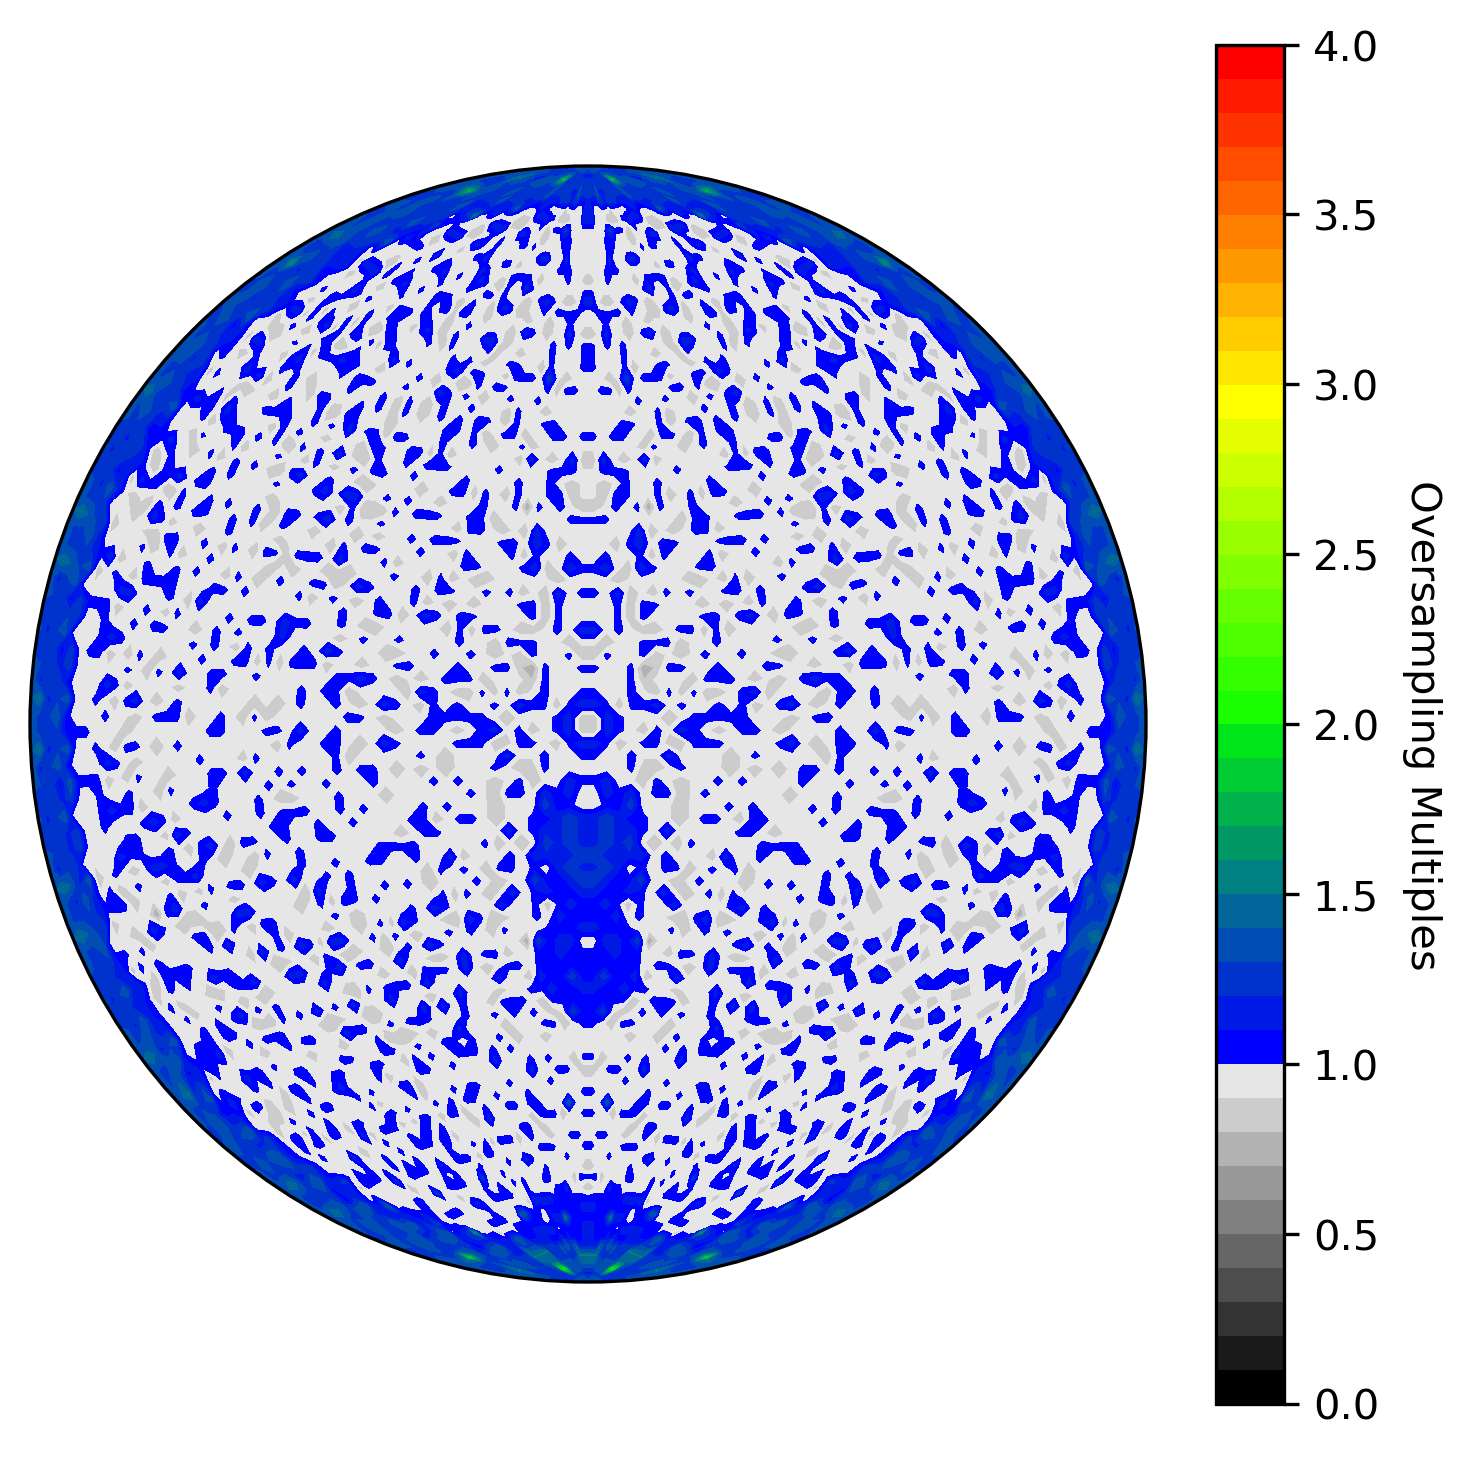

In [15]:
# Test plots moved from other notebooks

# Plot ODF key
# PlotTexture.ODFKey()

# Plot heatmap from Average Intensities
# PlotTexture.PlotHeatmap(IntensitesPath,20,"df2","HexGrid-60degTilt22p5degRes",[0.0,0.5])

# Plot different schemes on pole figures
#should I define the legend conventions somewhere else to reuse?
#SchemeName,Coordinates=TextureSampling.SingleOrientation("ND Single", 0.0,0.0)
#SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-90degTilt5degRes",60.0,21.0)
#PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'bD',10)

# With additional options
#SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-90degTilt5degRes",
#                                               90.0,5, CoverageType="full", IncludeND=False)
#print(Coordinates)
#PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'bD',10)

#SchemeName, Coordinates=TextureSampling.EqualAngleGrid('Equal Angle', 90.0, 5.0)
SchemeName, Coordinates=TextureSampling.CLRGrid('CLR', 90.0, 5.0, CoverageType='full')
#SchemeName, Coordinates=TextureSampling.BT8_HexGrid("BT8",90.0, 5.0, CoverageType="full")
#PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',2)
PlotTexture.DensityContourPlot(SchemeName, Coordinates)


#SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.5, np.arange(-90, 91, 5 ),'X')
#PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'yo',2)
#PlotTexture.DensityContourPlot(SchemeName, Coordinates)
#PlotTexture.DensityContourPlot(SchemeName, Coordinates, Weights=True)
#PlotTexture.PlotHeatmap(10,"3Pairs-C","RotRing Axis-Y Res-5.0 Theta-2.5 ",IntensitesPath, cbarRange=[0.2,0.3])

In [ ]:
Coordinates.to_csv("Coords.csv")

In [ ]:
SchemeName,Coordinates=TextureSampling.SingleOrientation("ND Single", 2.5,0)
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'ko',4)

## Create a dataframe of different Schemes, Coordinates, plot commands

In [7]:
column_names = ["SchemeName", "Coordinates", "MarkerType", "MarkerSize"]
SchemeDF = pd.DataFrame(columns = column_names)

#Used for BASIS SRP Interim reports
SchemeName,Coordinates=TextureSampling.EqualAngleGrid("Equal Angle", 90.0, 5.0, 'full')
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'nS',10]], 
                                      columns = column_names),ignore_index=True)

#SchemeName,Coordinates=TextureSampling.EqualAngleGrid("Equal Angle-60", 60.0, 5.0, 'full')
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'nS',10]], 
#                                      columns = column_names),ignore_index=True)
                            
#SchemeName,Coordinates=TextureSampling.EqualAngleGrid("Equal Angle-Quad60", 60.0, 5.0, 'quad')
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'nS',10]], 
#                                      columns = column_names),ignore_index=True)
#SchemeName,Coordinates=TextureSampling.EqualAngleGrid("Equal Angle-Quad", 90.0, 5.0, 'quad')
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'nS',10]], 
#                                      columns = column_names),ignore_index=True)

SchemeName, Coordinates=TextureSampling.CLRGrid('CLR', 90.0, 5.0, CoverageType='full')
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates,'nS',10]],columns=column_names),ignore_index=True)

#SchemeName, Coordinates=TextureSampling.CLRGrid('CLR-60', 60.0, 5.0, CoverageType='full')
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates,'nS',10]],columns=column_names),ignore_index=True)

#SchemeName, Coordinates=TextureSampling.CLRGrid('CLR-Quad', 90.0, 5.0, CoverageType='quad')
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates,'nS',10]],columns=column_names),ignore_index=True)

#SchemeName, Coordinates=TextureSampling.CLRGrid('CLR-Quad60', 60.0, 5.0, CoverageType='quad')
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates,'nS',10]],columns=column_names),ignore_index=True)


SchemeName,Coordinates=TextureSampling.BT8_HexGrid("BT8Hex", 90.0, 5.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)


#SchemeName,Coordinates=TextureSampling.BT8_HexGrid("BT8Hex-60", 60.0, 5.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)


#SchemeName,Coordinates=TextureSampling.BT8_HexGrid("BT8Hex-Quad", 90.0, 5.0, CoverageType='quad')
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)


#SchemeName,Coordinates=TextureSampling.BT8_HexGrid("BT8Hex-Quad60", 60.0, 5.0, CoverageType='quad')
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)





# Single Orientations
#SchemeName,Coordinates=TextureSampling.SingleOrientation("ND Single", 0.0,0.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'bS',10]], 
#                                      columns = column_names),ignore_index=True)
#SchemeName,Coordinates=TextureSampling.SingleOrientation("RD Single", 90.0,0.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'rS',10]], 
#                                      columns = column_names),ignore_index=True)
#SchemeName,Coordinates=TextureSampling.SingleOrientation("TD Single", 90.0,90.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'gS',10]], 
#                                      columns = column_names),ignore_index=True)
#SchemeName,Coordinates=TextureSampling.SingleOrientation("Morris Single", 60.0,90.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yS',10]], 
#                                      columns = column_names),ignore_index=True)
                    
## Ring Schemes

#SchemeName,Coordinates=TextureSampling.RingPerpND(5.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'b+',10]], 
#                                      columns = column_names),ignore_index=True)
#SchemeName,Coordinates=TextureSampling.RingPerpRD(5.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'r+',10]], 
#                                      columns = column_names),ignore_index=True)
#SchemeName,Coordinates=TextureSampling.RingPerpTD(5.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'g+',10]], 
#                                      columns = column_names),ignore_index=True)

# Tilt and Rotate Schemes
#SchemeName,Coordinates=TextureSampling.TiltRotate("NoRotation-tilt60deg", 120.0, 1600.0, 0.0,60.0,56.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'cd',4]], 
#                                      columns = column_names),ignore_index=True)
#SchemeName,Coordinates=TextureSampling.TiltRotate("Rotation-NoTilt", 120.0, 1600.0, 30.0,0.0,56.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'cd',4]], 
#                                      columns = column_names),ignore_index=True)
#SchemeName,Coordinates=TextureSampling.TiltRotate("Rotation-60detTilt", 120.0, 5000.0, 30.0,60.0,56.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'cd',4]], 
#                                      columns = column_names),ignore_index=True)
        
# Hex Grid Schemes      
SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-90degTilt5degRes",90.0,5.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
                                      columns = column_names),ignore_index=True)
#SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-90degTilt22p5degRes",60.0,5.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                      columns = column_names),ignore_index=True)
#SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-60degTilt5degRes",60.0,22.5)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                      columns = column_names),ignore_index=True)

# Used in DXC and Mines Fall 2020 Report
## Cube Corner
# SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-CC-5degRes",
#                                                90.0,5, CoverageType="quad", IncludeND=False)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-CC-15degRes",
#                                                90.0,15, CoverageType="quad", IncludeND=False)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-CC-22p5degRes",
#                                                90.0,22.5, CoverageType="quad", IncludeND=False)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-CC-30degRes",
#                                                90.0,30, CoverageType="quad", IncludeND=False)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                       columns = column_names),ignore_index=True)
# ## Sheet Normal
# SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-SN-5degRes",
#                                                60.0,5, CoverageType="quad", IncludeND=False)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-SN-15degRes",
#                                                60.0,15, CoverageType="quad", IncludeND=False)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-SN-22p5degRes",
#                                                60.0,22.5, CoverageType="quad", IncludeND=False)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-SN-30degRes",
#                                                60.0,30, CoverageType="quad", IncludeND=False)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                       columns = column_names),ignore_index=True)

## Rotated Rings, using calculated theta angle
# Additional entries for partial rings
#Austenite 111
# SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.84623415, np.arange(-90, 91, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.84623415, np.arange(-90, 91, 5 ),'Y', Weight=True)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.84623415, np.arange(-60, 61, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.84623415, np.arange(-30, 31, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# #Austenite 200
# SchemeName,Coordinates=TextureSampling.RingRot(5.0,3.28699929, np.arange(-90, 91, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,3.28699929, np.arange(-90, 91, 5 ),'Y', Weight=True)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,3.28699929, np.arange(-60, 61, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,3.28699929, np.arange(-30, 31, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# #Austenite 220
# SchemeName,Coordinates=TextureSampling.RingRot(5.0,4.65107599, np.arange(-90, 91, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,4.65107599, np.arange(-90, 91, 5 ),'Y', Weight=True)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,4.65107599, np.arange(-60, 61, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,4.65107599, np.arange(-30, 31, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)
# #Martensite 110
# SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.79042653, np.arange(-90, 91, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.79042653, np.arange(-90, 91, 5 ),'Y', Weight=True)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.79042653, np.arange(-60, 61, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.79042653, np.arange(-30, 31, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# #Martensite 200
# SchemeName,Coordinates=TextureSampling.RingRot(5.0,3.94782221, np.arange(-90, 91, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,3.94782221, np.arange(-90, 91, 5 ),'Y', Weight=True)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,3.94782221, np.arange(-60, 61, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,3.94782221, np.arange(-30, 31, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)
# #Martensite 220
# SchemeName,Coordinates=TextureSampling.RingRot(5.0,4.8369936, np.arange(-90, 91, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,4.8369936, np.arange(-90, 91, 5 ),'Y', Weight=True)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,4.8369936, np.arange(-60, 61, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,4.8369936, np.arange(-30, 31, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)



SchemeDF

,SchemeName,Coordinates,MarkerType,MarkerSize
0,Equal Angle,Tilt Rotation 0 0.0 0.0 1 ...,nS,10
1,CLR,Tilt Rotation 0 0.0 0.0 1 ...,nS,10
2,BT8Hex,Tilt Rotation 0 90.000000 ...,mh,4
3,HexGrid-90degTilt5degRes,Tilt Rotation 0 0.000000 0...,mh,4


In [ ]:
#SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.5, np.arange(-90, 91, 5 ),'Y', Weight=True)
#Coordinates.to_csv("Coords.csv")

In [ ]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

In [ ]:
# Plot the weighted and unweighted data

SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.5, np.arange(-90, 91, 5 ),'Y')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'ko',2,RD=False, save=True, savename="Chess-2p5theta.png")
PlotTexture.DensityContourPlot(SchemeName, Coordinates, save=True, savename="Chess-2p5theta-contour.png")

SchemeName,Coordinates=TextureSampling.RingRot(5.0,5.0, np.arange(-90, 91, 5 ),'Y')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'ko',2,RD=False, save=True, savename="Chess-5p0theta.png")
PlotTexture.DensityContourPlot(SchemeName, Coordinates, save=True, savename="Chess-5p0theta-contour.png")

SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.5, np.arange(-60, 61, 5 ),'Y')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'ko',2,RD=False, save=True, savename="Chess-2p5theta-omega60.png")
PlotTexture.DensityContourPlot(SchemeName, Coordinates, save=True, savename="Chess-2p5theta-omega60-contour.png")

SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.5, np.arange(-30, 31, 5 ),'Y')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'ko',2,RD=False, save=True, savename="Chess-2p5theta-omega30.png")
PlotTexture.DensityContourPlot(SchemeName, Coordinates, save=True, savename="Chess-2p5theta-omega30-contour.png")



# Still some issues with the weighting function for omega...

SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.5, np.arange(-90, 91, 5 ),'Y', Weight=True)
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'ko',2,RD=False)
PlotTexture.DensityContourPlot(SchemeName, Coordinates, Weights=True, save=True,
                               savename="Chess-2p5theta-contour-weighted.png")

SchemeName,Coordinates=TextureSampling.RingRot(5.0,5.0, np.arange(-90, 91, 5 ),'Y', Weight=True)
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'ko',2,RD=False)
PlotTexture.DensityContourPlot(SchemeName, Coordinates, Weights=True, save=True,
                               savename="Chess-5p0theta-contour-weighted.png")

#Coordinates.to_csv("Coords.csv")

In [ ]:
sum(Coordinates['Weights'])

In [ ]:
weight_list=[]
weight=1
omega_list=np.arange(-90, 91, 5 )
for omega_counter, omega_step in enumerate(omega_list):
    if omega_step==90:
        print("High")
        weight_list.append(weight/2.0)
    elif omega_step==-90:
        print("Low")
        weight_list.append(weight/2.0)
    else:
        weight_list.append(weight)
    

In [ ]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

In [ ]:
#Fix directory if lost
os.chdir(os.path.join("/Users", 'creuzige', 'Documents', 'NIST_Research','GitHub',
                 'Texture-Sampling-PhaseMeasurement-BiasErrors','JupyterNotebooks'))

In [ ]:
## Test Generation of Average Intensities from dataframe
# Experimental data only
# Mtex data

# Get the current working directory path
cwd=os.getcwd()
Mtexdatapath=os.path.abspath(os.path.join(cwd, '..', 'Matlab', 'ChessData'))
IntensitesPath=os.path.abspath(os.path.join(cwd, 'AveragedIntensities-AMExp'))
TextureSampling.GenerateAveIntesity(SchemeDF,"mtex", Mtexdatapath, IntensitesPath)

In [ ]:
## Test Generation of Average Intensities from dataframe
# Experimental data only

# Get the current working directory path
cwd=os.getcwd()
xpcdatapath=os.path.abspath(os.path.join(cwd, '..', 'MAUD', 'XPCFiles-Exp'))
IntensitesPath=os.path.abspath(os.path.join(cwd, 'AveragedIntensities-Exp'))
TextureSampling.GenerateAveIntesity(SchemeDF, "xpc",xpcdatapath, IntensitesPath)

In [8]:
## Test Generation of Average Intensities from dataframe
# Simulated data only

# Get the current working directory path
cwd=os.getcwd()
xpcdatapath=os.path.abspath(os.path.join(cwd, '..', 'MAUD', 'XPCFiles-HW20'))
IntensitesPath=os.path.abspath(os.path.join(cwd, 'AveragedIntensities-SRP'))
TextureSampling.GenerateAveIntesity(SchemeDF, "xpc", xpcdatapath, IntensitesPath)


File from listdir:  c:\Users\surya\Downloads\project\Texture-Sampling-PhaseMeasurement-BiasErrors\MAUD\XPCFiles-HW20\Alpha1F-HW20.xpc
pftype:  xpc
Pole Figure Parsing
You are now reading experimental pole figure(s): 
	c:\Users\surya\Downloads\project\Texture-Sampling-PhaseMeasurement-BiasErrors\MAUD\XPCFiles-HW20\Alpha1F-HW20.xpc
There are 8 blocks of data found
number of pole figures: 8
Alpha1F-HW20.xpc
File from listdir:  c:\Users\surya\Downloads\project\Texture-Sampling-PhaseMeasurement-BiasErrors\MAUD\XPCFiles-HW20\Alpha2F-HW20.xpc
pftype:  xpc
Pole Figure Parsing
You are now reading experimental pole figure(s): 
	c:\Users\surya\Downloads\project\Texture-Sampling-PhaseMeasurement-BiasErrors\MAUD\XPCFiles-HW20\Alpha2F-HW20.xpc
There are 8 blocks of data found
number of pole figures: 8
Alpha2F-HW20.xpc
File from listdir:  c:\Users\surya\Downloads\project\Texture-Sampling-PhaseMeasurement-BiasErrors\MAUD\XPCFiles-HW20\Alpha3F-HW20.xpc
pftype:  xpc
Pole Figure Parsing
You are now readi

In [7]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

<module 'PlotTexture' from 'c:\\Users\\surya\\Downloads\\project\\Texture-Sampling-PhaseMeasurement-BiasErrors\\JupyterNotebooks\\PlotTexture.py'>

In [9]:
#DFF["1Pair-A"]
cwd=os.getcwd()
xpcdatapath=os.path.abspath(os.path.join(cwd, '..', 'MAUD', 'XPCFiles-HW20'))
IntensitesPath=os.path.abspath(os.path.join(cwd, 'AveragedIntensities-SRP'))

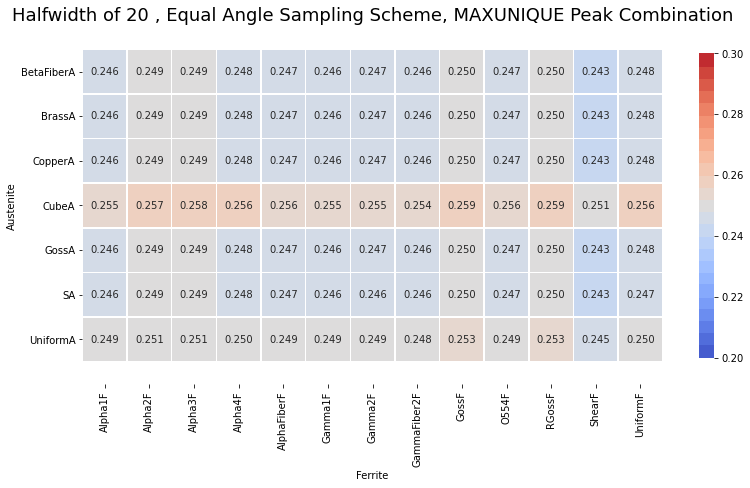

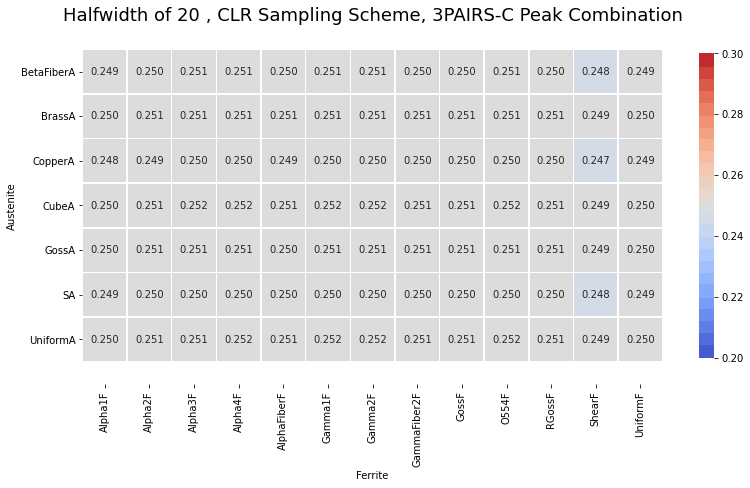

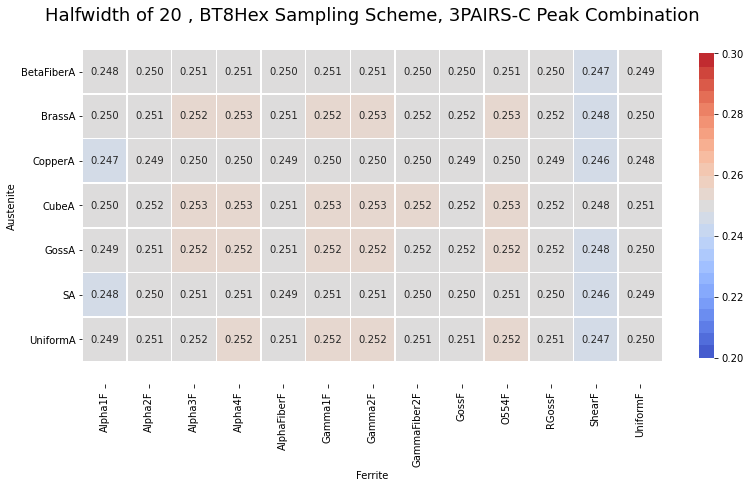

In [39]:
# Test Heatmap
#PlotTexture.PlotHeatmap(20,"2Pairs-A","ND Single",IntensitesPath)
#PlotTexture.PlotHeatmap(20,"3Pairs-A","ND Single",IntensitesPath)
#PlotTexture.PlotHeatmap(20,"1Pair-A","RotRing Axis-Y Res-5.0 Theta-2.79042653 OmegaMax-90",
                        #IntensitesPath, VF=.54,cbarRange=[0.40,0.68],save=True,savename='Chess-1pairA-omega90.png')
#PlotTexture.PlotHeatmap(20,"1Pair-A","RotRing Axis-Y Res-5.0 Theta-2.84623415 OmegaMax-90 Weighted",
                        #IntensitesPath, VF=.54,cbarRange=[0.40,0.68],save=True,savename='Chess-1pairA-omega90W.png')
#PlotTexture.PlotHeatmap(20,"1Pair-A","RotRing Axis-Y Res-5.0 Theta-2.79042653 OmegaMax-60",
                        #IntensitesPath, VF=.54,cbarRange=[0.40,0.68],save=True,savename='Chess-1pairA-omega60.png')
#PlotTexture.PlotHeatmap(20,"1Pair-A","RotRing Axis-Y Res-5.0 Theta-2.79042653 OmegaMax-30",
                        #IntensitesPath, VF=.54,cbarRange=[0.40,0.68],save=True,savename='Chess-1pairA-omega30.png')
#PlotTexture.PlotHeatmap(20,"3Pairs-C","RotRing Axis-Y Res-5.0 Theta-2.79042653 OmegaMax-90",
                        #IntensitesPath, VF=.54,cbarRange=[0.40,0.68],save=True,savename='Chess-3pairsC-omega90.png')
#PlotTexture.PlotHeatmap(20, "1Pair-A", "CLR", IntensitesPath, VF=.25, cbarRange=[0.2,0.3])
#PlotTexture.PlotHeatmap(20, "3Pairs-C", "HexGrid-90degTilt5degRes", IntensitesPath, VF=.25, cbarRange=[0.2,0.3])
PlotTexture.PlotHeatmap(20, "MaxUnique", "Equal Angle", IntensitesPath, VF=.25, cbarRange=[0.2,0.3])
PlotTexture.PlotHeatmap(20, "3Pairs-C", "CLR", IntensitesPath, VF=.25, cbarRange=[0.2,0.3])
#PlotTexture.PlotHeatmap(20, "2Pairs-A", "BT8Hex", IntensitesPath, VF=.25, cbarRange=[0.2,0.3])
PlotTexture.PlotHeatmap(20, "3Pairs-C", "BT8Hex", IntensitesPath, VF=.25, cbarRange=[0.2,0.3])
#PlotTexture.PlotHeatmap(20,"3Pairs-C","RotRing Axis-Y Res-5.0 Theta-5.0 ",IntensitesPath,cbarMap='grey', cbarRange=[0.2,0.3])

In [ ]:
# Get the current working directory path
cwd=os.getcwd()
#print cwd
xpcdatapath=os.path.abspath(os.path.join(os.path.dirname(cwd)))
#print xpcdatapath
# Use join instead, it's better cross platform
Folder=os.path.join(cwd,'AveragedIntensites')
DFA=pd.read_excel(os.path.join(Folder, 'o554F-HW20.xlsx'))
print(DFA)

In [ ]:
# Plot Density Contours for texture components
import glob
def PlotTextureComponents(texComp,datafolder):
    cwd=os.getcwd()
    xpcdatapath=os.path.abspath(os.path.join(cwd, '..', 'MAUD', datafolder))
    for file in glob.glob(os.path.join(xpcdatapath, '*')):
        XPCfile=(os.path.join(xpcdatapath, file))
        (head,tail)=os.path.split(file)
                #Split for HW
        if "-" in tail:
            orientation, hw=tail.split('-')
        else:
            orientation, ext=tail.split('.')
                    
                
    #for XPCfile in listoffiles:
        if orientation==texComp:
            print("File from listdir: ",file)
            (pfs,hkllist)=TextureSampling.xpcformat('xpc',XPCfile)
            i=0
            for i in range(0,len(pfs)):
                tilt=0
                rot=0
                dip=[]
                strike=[]
                while(tilt<=90):
                    while(rot<=355):
                        weight=pfs[i].loc[tilt,rot].iloc[0]
                        dip.extend([tilt]*weight)
                        strike.extend([rot]*weight)
                        rot=rot+5
                    tilt=tilt+5
                    rot=0

                d = {'Tilt' : dip, 'Rotation' : strike}
                coordinates=pd.DataFrame(d)
                name=orientation+", "+str(hkllist[i+1])
                print(name+ " pole figure plots:")
                PlotTexture.DensityContourPlot(name, coordinates)
                tilt=0
                rot=0
                dip=[]
                strike=[]
                i=i+1
                
                

PlotTextureComponents("Alpha2F", "XPCFiles-HW20") #test function  


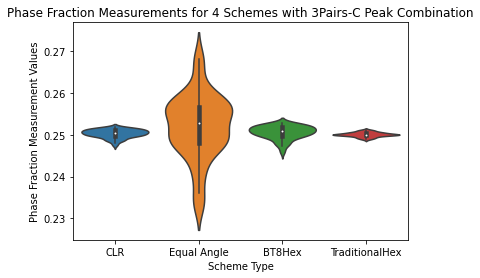

In [46]:
import fnmatch
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
def ViolinPlots(hw, PeakCombo, Folder, Schemelist=['CLR', 'Equal Angle', 'BT8Hex', 'HexGrid-90degTilt5degRes'], VF=0.25):
    HW=str(hw)
    AusteniteTextures=[]
    FerriteTextures=[] 

    for file in os.listdir(Folder):
    
        if (file.find("A-HW"+HW)>0):
            AusteniteTextures.append(file)
        elif (file.find("F-HW"+HW)>0):
            FerriteTextures.append(file)
        else: ()
        
        #print (FerriteTextures)
        #print AusteniteTextures
    
    CLRData=[]
    EAData=[]
    BT8HexData=[]
    HexData=[]
    for Scheme in Schemelist:
        if Scheme=='CLR':
            VFList=CLRData
        elif Scheme=='Equal Angle':
            VFList=EAData
        elif Scheme=='BT8Hex':
            VFList=BT8HexData
        else:
            VFList=HexData

        for AustOrient in AusteniteTextures:
            for FerrOrient in FerriteTextures:
        
            
                DFF=pd.read_excel(os.path.join(Folder,FerrOrient),header=1,skipfooter=0)
                DFA=pd.read_excel(os.path.join(Folder,AustOrient),header=1,skipfooter=0)

                # Revised, some issues with what's returned
                # Pandas returns a larger array instead of just one value - AC 2021 Mar 29
                F_val=float(DFF.loc[DFF['HKL'] == Scheme][PeakCombo])
                A_val=float(DFA.loc[DFA['HKL'] == Scheme][PeakCombo])
                #print (DFF)
                #print (DFA)
                
            
                # Append to lists
                VFList.append(VF*A_val/(VF*A_val+((1.0-VF)*F_val)))        
    
    VFList=[]

    df = pd.DataFrame({'CLR': CLRData, 'Equal Angle': EAData, 'BT8Hex': BT8HexData, 'TraditionalHex': HexData})
    ax= sns.violinplot(data=df, scale='count', inner='box')
    ax.set_title("Phase Fraction Measurements for "+ str(len(Schemelist))+ " Schemes with "+str(PeakCombo)+ " Peak Combination")
    ax.set_ylabel("Phase Fraction Measurement Values")
    ax.set_xlabel("Scheme Type")




ViolinPlots(20, "3Pairs-C", IntensitesPath)
    

# Still needs to be migrated

## Generate average intensity based on pole figures and coordinates
- This section calculates the average intensity and saves to file
- Looks for the list of XPC files and calculates a table (.xlsx) for each

_Skip if you only wish to plot the sampling schemes_

# Plots

# Plot pole figures of sampling positions

## Plot all the Sampling methods

In [ ]:
# Note - MPLStereonet uses a different angle convention (geosciences) than is used for crystallography
# A rotation of 90° is needed to align the coordiantes
# TD, Morris rotated by 270° to be in the same quadrant as Matlab
#dip = (Coordinates['Rotation']-90.0)


# 3 x 3 subplot grid
# single, ring, key
# Tilt/Rotate
# Hex Grids

fig = plt.figure(figsize=(8,9), dpi=600)


#key
ax1 = fig.add_subplot(331, projection='stereonet')
ax1.set_azimuth_ticks([0,90], labels=['RD','-- TD'],fontsize=14) 
ax1.plane(0.0, 90.0, 'k-', linewidth=1)
ax1.plane(90.0, 90.0, 'k-', linewidth=1)
ax1.annotate('(a)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)
ax1.annotate('ND', xy=(0, 0), xytext=(0.1,0.1), fontsize=14)


#Single orientations

ax2 = fig.add_subplot(332, projection='stereonet')

ax2.plane(0.0, 90.0, 'k-', linewidth=1)
ax2.plane(90.0, 90.0, 'k-', linewidth=1)
            #if q==1: SchemeName,Coordinates=SingleOrientation("ND Single", 0.0,0.0)
            #elif q==2: SchemeName,Coordinates=SingleOrientation("RD Single", 90.0,0.0)
            #elif q==3: SchemeName,Coordinates=SingleOrientation("TD Single", 90.0,90.0)
            #elif q==4: SchemeName,Coordinates=SingleOrientation("Morris", 60.0,90.0)
                
SchemeName,Coordinates=SingleOrientation("ND Single", 0.0,0.0)
dip, strike =Coordinates['Tilt'], (Coordinates['Rotation']-90.0)
l1=ax2.pole(strike, dip, 'bs', markersize=10, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)

SchemeName,Coordinates=SingleOrientation("RD Single", 90.0,180.0)
dip, strike =Coordinates['Tilt'], (Coordinates['Rotation']-90.0)
l2=ax2.pole(strike, dip, 'rs', markersize=10, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)

SchemeName,Coordinates=SingleOrientation("TD Single", 90.0,270.0)
dip, strike =Coordinates['Tilt'], (Coordinates['Rotation']-90.0)
l3=ax2.pole(strike, dip, 'gs', markersize=10, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)

SchemeName,Coordinates=SingleOrientation("Morris", 60.0,270.0)
dip, strike =Coordinates['Tilt'], (Coordinates['Rotation']-90.0)
l4=ax2.pole(strike, dip, 'ys', markersize=10, clip_on=False, markeredgecolor='black', markeredgewidth=0.5)

ax2.set_azimuth_ticks([90,0], labels=['',''])
ax2.annotate('(b)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)

#ax1.grid()
#for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    #dip, strike =  row['Tilt'], row['Rotation']
    #ax1.pole(strike, dip, 'g^', markersize=5)
    
    
    #ax.plane(strike, dip, 'g-', linewidth=2)
    #ax.rake(strike, dip, -70)
    
# Ring Orientations
ax3 = fig.add_subplot(333, projection='stereonet')
ax3.annotate('(c)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)
ax3.set_azimuth_ticks([90,0], labels=['','']) 


SchemeName,Coordinates=RingPerpND(5.0)
ax3.plane(0.0, 0.0, 'b-', linewidth=3)
ax3.plane(0.0, 180.0, 'b-', linewidth=3)
for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    dip, strike =  row['Tilt'], (row['Rotation']-90.0)
    ax3.pole(strike, dip, 'k+', markersize=10, clip_on=False)



SchemeName,Coordinates=RingPerpRD(5.0)
ax3.plane(-90.0, 90.0, 'r-', linewidth=3) #0.0 (RD)-90.0 (Strike Converntion ) = -90.0Dip
for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    dip, strike =  row['Tilt'], (row['Rotation']-90.0)
    ax3.pole(strike, dip, 'r+', markersize=10, clip_on=False)


SchemeName,Coordinates=RingPerpTD(5.0)
ax3.plane(0.0, 90.0, 'g-', linewidth=3)#90.0 (TD)-90.0 (Strike Converntion ) = 0.0Dip
for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    dip, strike =  row['Tilt'], (row['Rotation']-90.0)
    ax3.pole(strike, dip, 'g+', markersize=10, clip_on=False)






ax4 = fig.add_subplot(334, projection='stereonet')
ax4.annotate('(d)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)
ax4.set_azimuth_ticks([90,0], labels=['','']) 
ax4.plane(0.0, 90.0, 'k-', linewidth=1)
ax4.plane(90.0, 90.0, 'k-', linewidth=1)
SchemeName,Coordinates=TiltRotate("Rotation-NoTilt", 120.0, 1600.0, 30.0,0.0,56.0)
for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    dip, strike =  row['Tilt'], (row['Rotation']-90.0)
    ax4.pole(strike, dip, 'cD', markersize=5, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)



ax5 = fig.add_subplot(335, projection='stereonet')
ax5.annotate('(e)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)
ax5.plane(0.0, 90.0, 'k-', linewidth=1)
ax5.plane(90.0, 90.0, 'k-', linewidth=1)
ax5.set_azimuth_ticks([90,0], labels=['','']) 
SchemeName,Coordinates=TiltRotate("NoRotation-tilt60deg", 120.0, 1600.0, 0.0,60.0,56.0)
for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    dip, strike =  row['Tilt'], (row['Rotation']-90.0)
    ax5.pole(strike, dip, 'cD', markersize=3, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)


ax6 = fig.add_subplot(336, projection='stereonet')
ax6.annotate('(f)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)
ax6.plane(0.0, 90.0, 'k-', linewidth=1)
ax6.plane(90.0, 90.0, 'k-', linewidth=1)
ax6.set_azimuth_ticks([90,0], labels=['','']) 
SchemeName,Coordinates=TiltRotate("Rotation-60detTilt", 120.0, 5000.0, 30.0,60.0,56.0)
for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    dip, strike =  row['Tilt'], (row['Rotation']-90.0)
    ax6.pole(strike, dip, 'cD', markersize=2, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)


    
# Hex Grids

ax7 = fig.add_subplot(337, projection='stereonet')
ax7.annotate('(g)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)
ax7.plane(0.0, 90.0, 'k-', linewidth=1)
ax7.plane(90.0, 90.0, 'k-', linewidth=1)
ax7.set_azimuth_ticks([90,0], labels=['',''])
#MCchanges
SchemeName,Coordinates=HexGrid("HexGrid-90degTilt5degRes",60.0,21.0)
#SchemeName,Coordinates=HexGrid("HexGrid-90degTilt5degRes",90.0,5.0)
#MCchanges
for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    dip, strike =  row['Tilt'], (row['Rotation']-90.0)
    ax7.pole(strike, dip, 'mh', markersize=2, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)


ax8 = fig.add_subplot(338, projection='stereonet')
ax8.annotate('(h)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)
ax8.plane(0.0, 90.0, 'k-', linewidth=1)
ax8.plane(90.0, 90.0, 'k-', linewidth=1)
ax8.set_azimuth_ticks([90,0], labels=['','']) 
#MCchanges
#SchemeName,Coordinates=HexGrid("HexGrid-90degTilt22p5degRes",90.0,22.0)
SchemeName,Coordinates=HexGrid("HexGrid-90degTilt22p5degRes",60.0,15)
#MCchanges
for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    dip, strike =  row['Tilt'], (row['Rotation']-90.0)
    ax8.pole(strike, dip, 'mh', markersize=4, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)



ax9 = fig.add_subplot(339, projection='stereonet')
ax9.annotate('(i)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)
ax9.plane(0.0, 90.0, 'k-', linewidth=1)
ax9.plane(90.0, 90.0, 'k-', linewidth=1)
ax9.set_azimuth_ticks([90,0], labels=['','']) 
#MCchanges
SchemeName,Coordinates=HexGrid("HexGrid-60degTilt5degRes",60.0,20.5)
#SchemeName,Coordinates=HexGrid("HexGrid-60degTilt5degRes",60.0,5.0)
#MCchanges
for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    dip, strike =  row['Tilt'], (row['Rotation']-90.0)
    ax9.pole(strike, dip, 'mh', markersize=2, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)


# Legend
import matplotlib.lines as mlines
blue_dot = mlines.Line2D([], [], color='white', marker='s', mfc='b',
                          markersize=15, label='',markeredgecolor='black', markeredgewidth=0.5)
red_dot = mlines.Line2D([], [], color='white', marker='s', mfc='r',
                          markersize=15, label='',markeredgecolor='black', markeredgewidth=0.5)
green_dot = mlines.Line2D([], [], color='white', marker='s', mfc='g',
                          markersize=15, label='',markeredgecolor='black', markeredgewidth=0.5)
yellow_dot = mlines.Line2D([], [], color='white', marker='s', mfc='y',
                          markersize=15, label='',markeredgecolor='black', markeredgewidth=0.5)

blue_plus = mlines.Line2D([], [], color='white', marker='+', mec='b', mew=2.0,
                          markersize=15, label='')
red_plus = mlines.Line2D([], [], color='white', marker='+', mec='r',mew=2.0,
                          markersize=15, label='')
green_plus = mlines.Line2D([], [], color='white', marker='+', mec='g',mew=2.0,
                          markersize=15, label='')

cyan_square = mlines.Line2D([], [], color='white', marker='D', mfc='c',
                          markersize=12, label='',markeredgecolor='black', markeredgewidth=0.5)

mag_hex = mlines.Line2D([], [], color='white', marker='h', mfc='m',
                          markersize=15, label='',markeredgecolor='black', markeredgewidth=0.5)

handles=[blue_dot, red_dot, green_dot,  blue_plus, red_plus, green_plus, yellow_dot, cyan_square, mag_hex]
labels=['ND Single','RD Single','TD Single', 'ND Ring','RD Ring','TD Ring','Morris Single', 'Tilt and Rotation', 'Hexagonal Grid' ]


#plt.figlegend((handles),(labels),'lower center', numpoints=1, ncol=3,fontsize=16,bbox_to_anchor=[0.46, -0.015])
plt.figlegend((handles),(labels),'lower center', numpoints=1, ncol=3,fontsize=16)


#swtich between saving figure and showing the figure

#plt.savefig("SamplingSchemes-Draft.eps", dpi=600,format="eps")
#plt.savefig("SamplingSchemes-Draft.pdf", dpi=600,format="pdf")
plt.savefig("SamplingSchemes-Draft.png", dpi=600,format="png")
plt.show()